In [23]:

import sys
import os
sys.path.insert(0,os.path.abspath('../scripts'))
import functions as fn
import importlib
importlib.reload(fn)

# Module 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
file_name = '../data/clean_telecom_data.csv'
data = functions.read_csv(file_name)

In [33]:
marketing_df = functions.Marketing(data)
marketing_df.filter_necessary_columns()
marketing_df.df.head()


,MSISDN/Number,Handset Type,Handset Manufacturer
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,Samsung
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),Samsung
2,3.376063e+10,Samsung Galaxy A8 (2018),Samsung
3,3.375034e+10,Huawei B528S-23A,Apple
4,3.369980e+10,Samsung Sm-G390F,Samsung


In [35]:
#Top 10 handsets
top_10_handsets =  marketing_df.get_top_handsets(10)
top_10_handsets

,Handset Type,MSISDN/Number
315,Huawei B528S-23A,28631
53,Apple iPhone 6S (A1688),9395
49,Apple iPhone 6 (A1586),8993
59,Apple iPhone 7 (A1778),6279
73,Apple iPhone Se (A1723),5165
66,Apple iPhone 8 (A1905),4977
78,Apple iPhone Xr (A2105),4556
951,Samsung Galaxy S8 (Sm-G950F),4464
75,Apple iPhone X (A1901),3806
834,Samsung Galaxy A5 Sm-A520F,3700


In [36]:
# Top 3 Handset Manufacturers
top_3_manufacturers =  marketing_df.get_top_manufacturers(3)
top_3_manufacturers

,Handset Manufacturer,MSISDN/Number
5,Apple,68243
103,Samsung,40429
52,Huawei,34296


In [37]:
best_phones = marketing_df.get_best_phones()

**** Apple ***
Handset Type
Apple iPhone 6S (A1688)    6744
Huawei B528S-23A           6650
Apple iPhone 6 (A1586)     6245
Apple iPhone 7 (A1778)     4675
Apple iPhone Se (A1723)    3744
Name: MSISDN/Number, dtype: int64

**** Samsung ***
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3232
Samsung Galaxy J5 (Sm-J530)     2741
Samsung Galaxy A5 Sm-A520F      2701
Samsung Galaxy J3 (Sm-J330)     2582
Samsung Galaxy S7 (Sm-G930X)    2288
Name: MSISDN/Number, dtype: int64

**** Huawei ***
Handset Type
Huawei B528S-23A                  10616
Huawei P20 Lite Huawei Nova 3E     1526
Huawei E5180                       1182
Huawei P20                         1105
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



Aggregate per user the following information in the column  
1. number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application

In [38]:
df_clean = data.copy()
aggrigate = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
aggrigation_result = df_clean.groupby('MSISDN/Number').agg(aggrigate)
aggrigation_result.head()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,
3.360100e+10,1,116720.0,36053108.0,8.426375e+08
3.360100e+10,1,181230.0,36104459.0,1.207552e+08
3.360100e+10,1,134969.0,39306820.0,5.566597e+08
3.360101e+10,1,49878.0,20327526.0,4.019932e+08
3.360101e+10,2,37104.0,94280527.0,1.363130e+09


Total download and upload of each application

In [39]:
user_app_usage = df_clean.copy()

user_app_usage["Total Google"]    = user_app_usage["Google DL (Bytes)"] + user_app_usage["Google UL (Bytes)"]
user_app_usage["Total Youtube"]   = user_app_usage["Youtube DL (Bytes)"] + user_app_usage["Youtube UL (Bytes)"]
user_app_usage["Total Netflix"]   = user_app_usage["Netflix DL (Bytes)"] + user_app_usage["Netflix UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email DL (Bytes)"] + user_app_usage["Email UL (Bytes)"]
user_app_usage["Total Gaming"]    = user_app_usage["Gaming DL (Bytes)"] + user_app_usage["Gaming UL (Bytes)"]
user_app_usage["Total Social Media"] = user_app_usage["Social Media DL (Bytes)"] + user_app_usage["Social Media UL (Bytes)"]
user_app_usage["Total Other"]     = user_app_usage["Other DL (Bytes)"] + user_app_usage["Other UL (Bytes)"]
user_app_usage['Total']           = user_app_usage['Total UL (Bytes)'] + user_app_usage['Total DL (Bytes)']

Non-Graphical Analysis of user behaviour on total data of each application

In [40]:
total_app_columns = ['MSISDN/Number','Total Google', 'Total Youtube', 'Total Netflix', 'Total Email', \
                     'Total Gaming', 'Total Social Media', 'Total Other', 'Total']
user_app_behaviour = user_app_usage[total_app_columns].groupby('MSISDN/Number').sum().sample(10)
user_app_behaviour

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
MSISDN/Number,,,,,,,,
3.369820e+10,10276216.0,28966788.0,15740367.0,2075135.0,705938338.0,1551703.0,542913492.0,7.679071e+08
3.366736e+10,4400034.0,33385470.0,6619130.0,570391.0,852128404.0,3520659.0,545409634.0,9.100139e+08
3.364167e+10,4787740.0,4007263.0,3931888.0,1023181.0,606903466.0,1239676.0,695182541.0,6.364047e+08
3.361794e+10,6179112.0,36017689.0,17799606.0,1937588.0,326873610.0,856993.0,115260023.0,4.033622e+08
3.362802e+10,2421141.0,16894052.0,24998119.0,789212.0,461193044.0,2259847.0,33994941.0,5.154989e+08
3.366434e+10,9892130.0,19032411.0,24827989.0,1588476.0,813466089.0,76038.0,559469518.0,8.852093e+08
3.366055e+10,8581721.0,13841486.0,27667783.0,4436276.0,416126664.0,916648.0,191520125.0,4.812154e+08
3.376803e+10,2145894.0,32434030.0,26850754.0,1551366.0,146143445.0,1519717.0,103402627.0,2.146397e+08
3.378294e+10,16744962.0,39954800.0,44286741.0,2621649.0,990753099.0,1607437.0,704678320.0,1.108083e+09


Task 1.2

In [41]:
column_for_analysis = ['Bearer Id','Dur. (ms)' ,'MSISDN/Number','Total Google', 'Total Youtube', \
                       'Total Netflix', 'Total Email', 'Total Gaming', 'Total Social Media', 'Total Other', 'Total']

user_app_behaviour = user_app_usage[column_for_analysis]

All the relevant columns and their data types

In [42]:
user_app_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Bearer Id           148506 non-null  float64
 1   Dur. (ms)           148506 non-null  float64
 2   MSISDN/Number       148506 non-null  float64
 3   Total Google        148506 non-null  float64
 4   Total Youtube       148506 non-null  float64
 5   Total Netflix       148506 non-null  float64
 6   Total Email         148506 non-null  float64
 7   Total Gaming        148506 non-null  float64
 8   Total Social Media  148506 non-null  float64
 9   Total Other         148506 non-null  float64
 10  Total               148506 non-null  float64
dtypes: float64(11)
memory usage: 12.5 MB


Analyse the metrics of the dataset

In [43]:
user_app_behaviour.describe()

,Bearer Id,Dur. (ms),MSISDN/Number,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
count,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.014676e+19,100018.863263,4.190654e+10,7.808063e+06,2.264244e+07,2.262914e+07,2.259188e+06,4.303538e+08,1.828066e+06,4.294152e+08,4.957834e+08
std,2.893262e+18,58987.437483,2.450976e+12,3.516724e+06,9.247684e+06,9.260477e+06,1.071152e+06,2.440569e+08,1.035638e+06,2.432284e+08,2.444146e+08
min,6.917538e+18,7142.000000,3.360100e+10,4.033000e+04,7.890300e+04,9.843200e+04,8.359000e+03,3.063580e+05,1.563000e+03,1.490450e+05,2.895611e+07
25%,7.349883e+18,58248.750000,3.365131e+10,4.944994e+06,1.599374e+07,1.598016e+07,1.359336e+06,2.187362e+08,9.321828e+05,2.186682e+08,2.845286e+08
50%,7.349883e+18,86399.000000,3.366371e+10,7.815669e+06,2.266131e+07,2.263632e+07,2.264186e+06,4.316585e+08,1.825931e+06,4.300438e+08,4.969225e+08
75%,1.304243e+19,132932.750000,3.368352e+10,1.068307e+07,2.929824e+07,2.928832e+07,3.160024e+06,6.415282e+08,2.727493e+06,6.398960e+08,7.065677e+08
max,1.318654e+19,244958.750000,8.823971e+14,1.552878e+07,4.519008e+07,4.519815e+07,4.518036e+06,8.592028e+08,3.650861e+06,8.595209e+08,9.559848e+08


Univariant analysis

<Figure size 900x700 with 0 Axes>

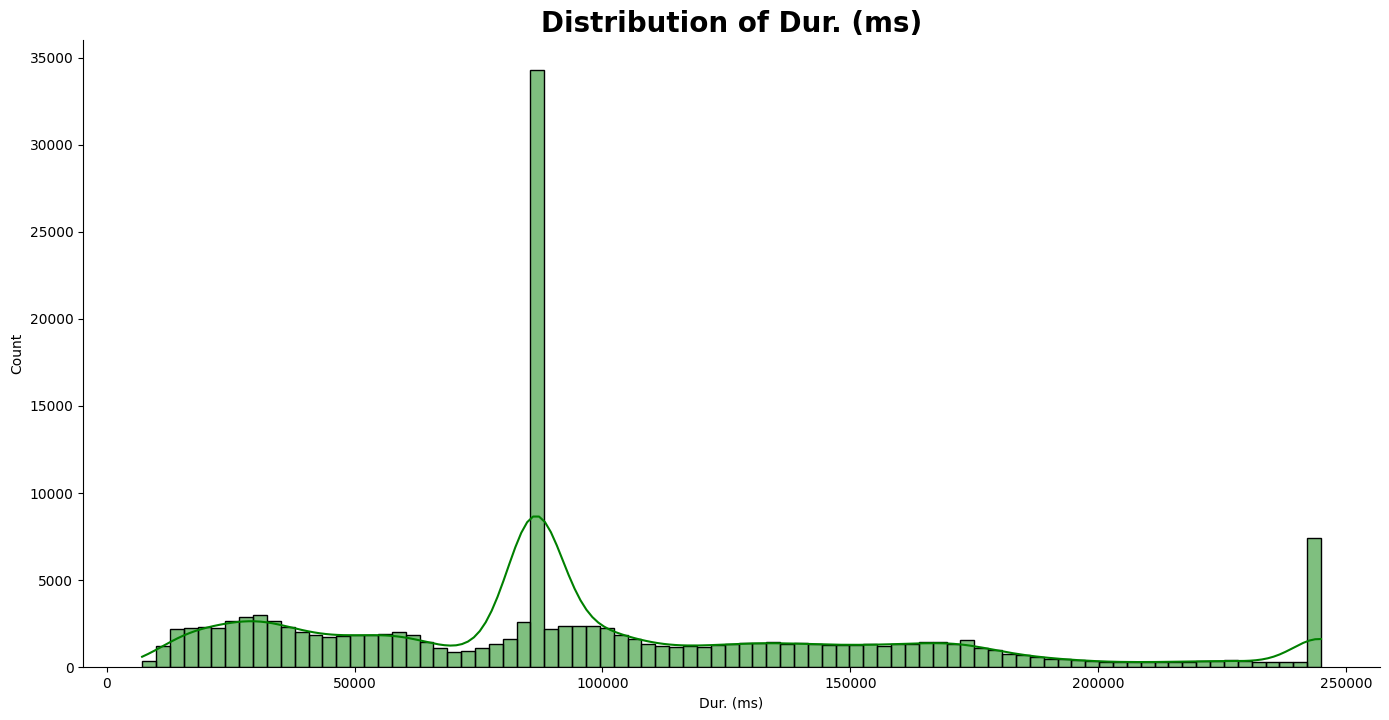

In [45]:
functions.hist(user_app_behaviour, 'Dur. (ms)','green') 

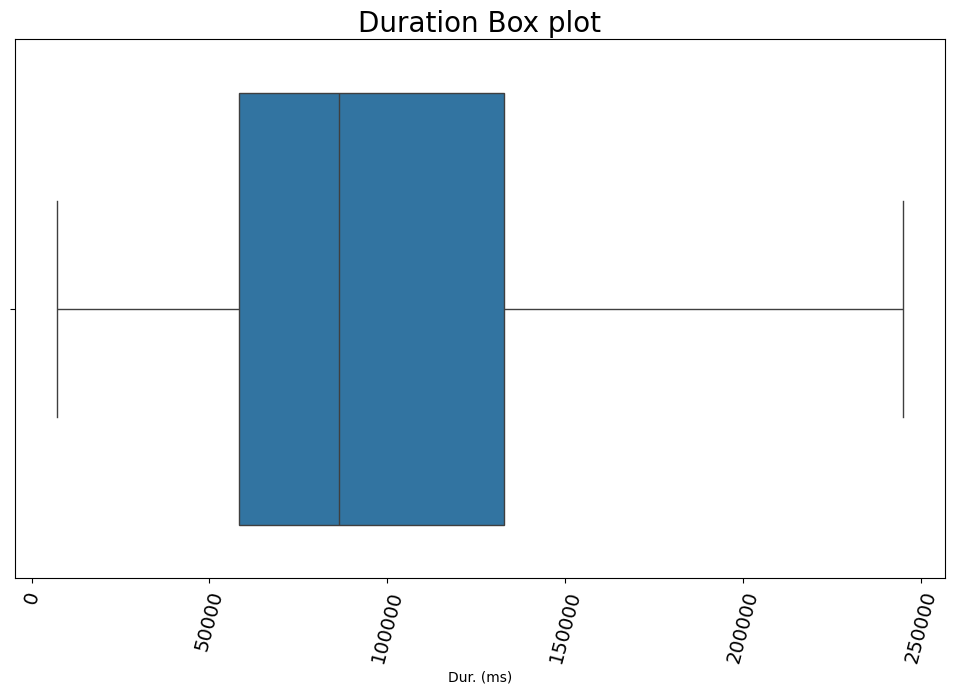

In [46]:
functions.plot_box(user_app_behaviour, 'Dur. (ms)', 'Duration Box plot')

<Figure size 900x700 with 0 Axes>

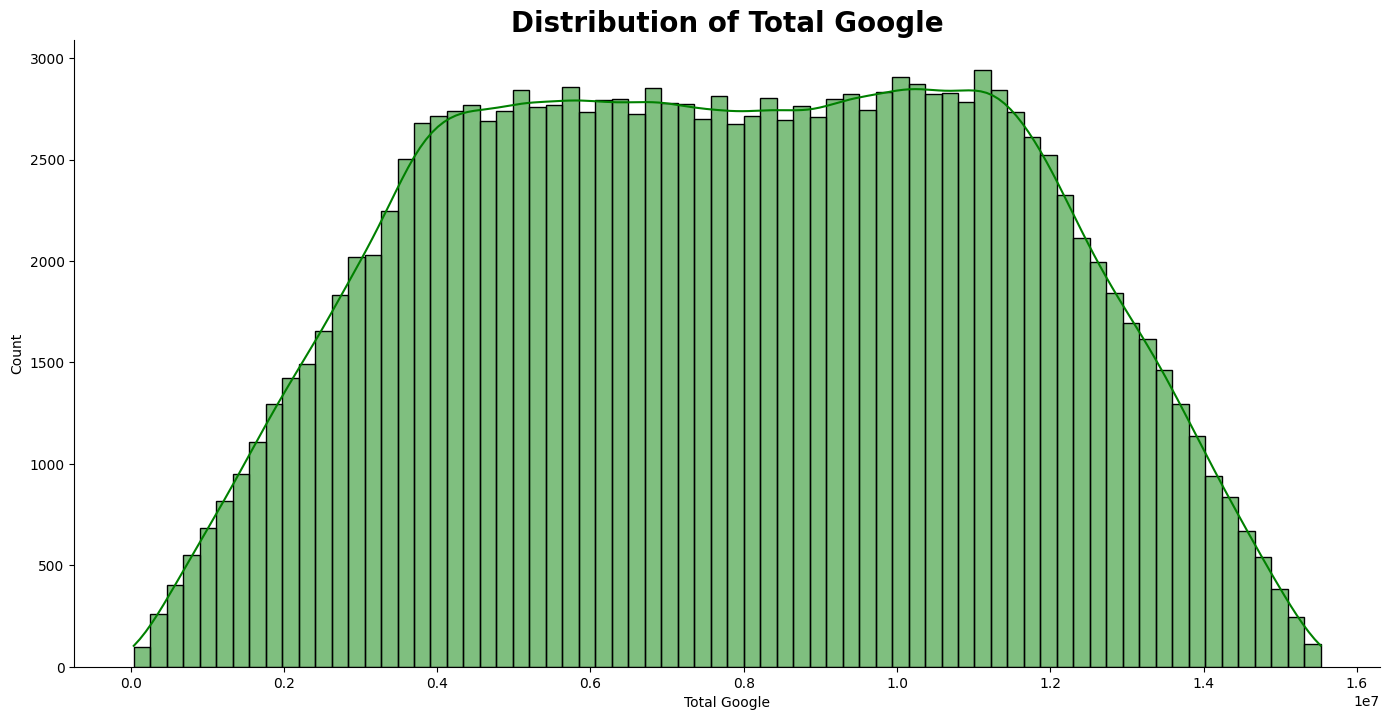

In [48]:
functions.hist(user_app_behaviour, 'Total Google', 'green')

<Figure size 900x700 with 0 Axes>

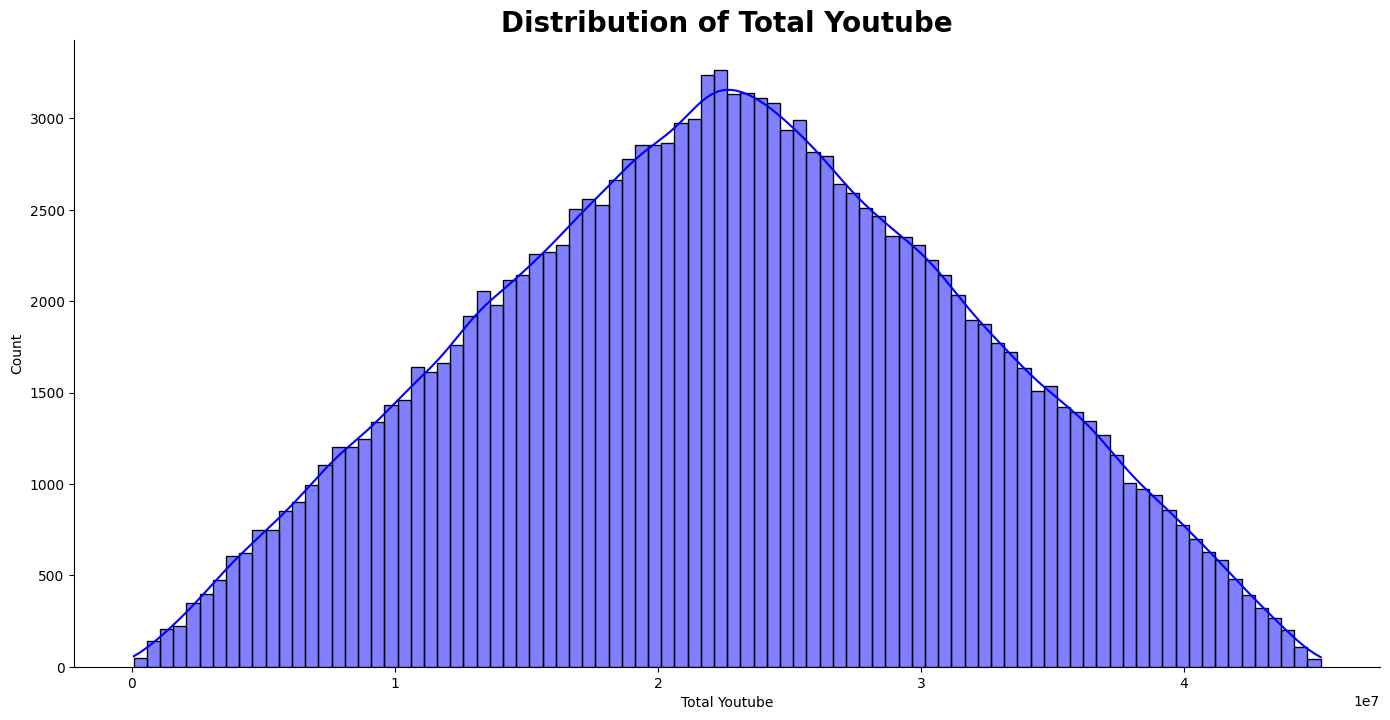

In [49]:
functions.hist(user_app_behaviour, 'Total Youtube', 'blue')

<Figure size 900x700 with 0 Axes>

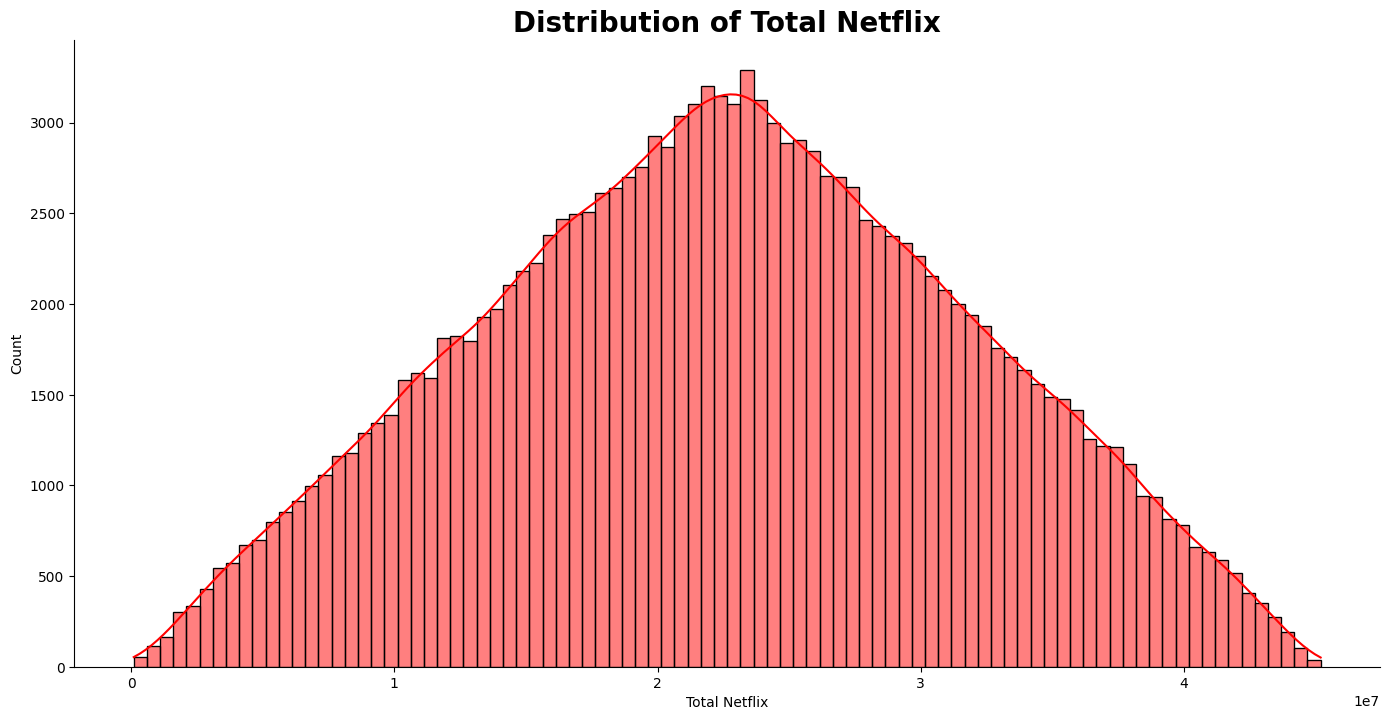

In [50]:
functions.hist(user_app_behaviour, 'Total Netflix', 'red')

<Figure size 900x700 with 0 Axes>

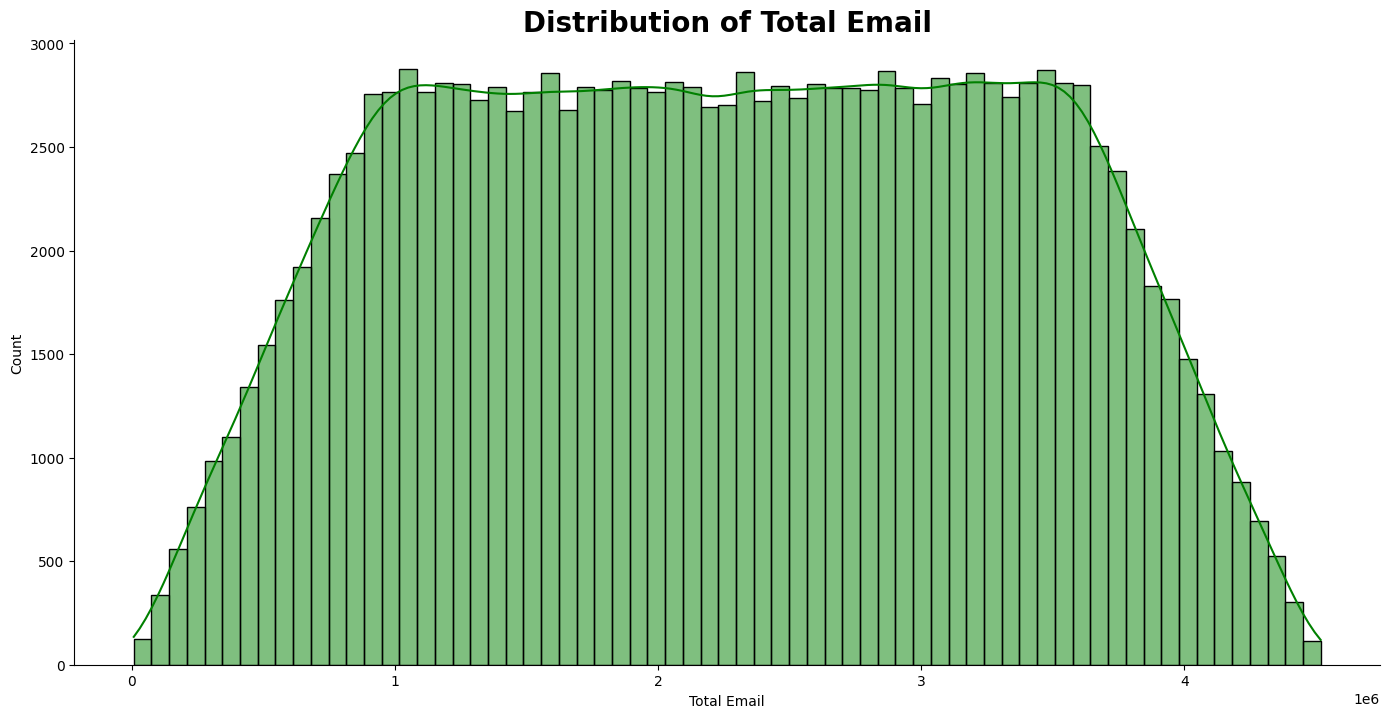

In [51]:
functions.hist(user_app_behaviour, 'Total Email', 'green')

<Figure size 900x700 with 0 Axes>

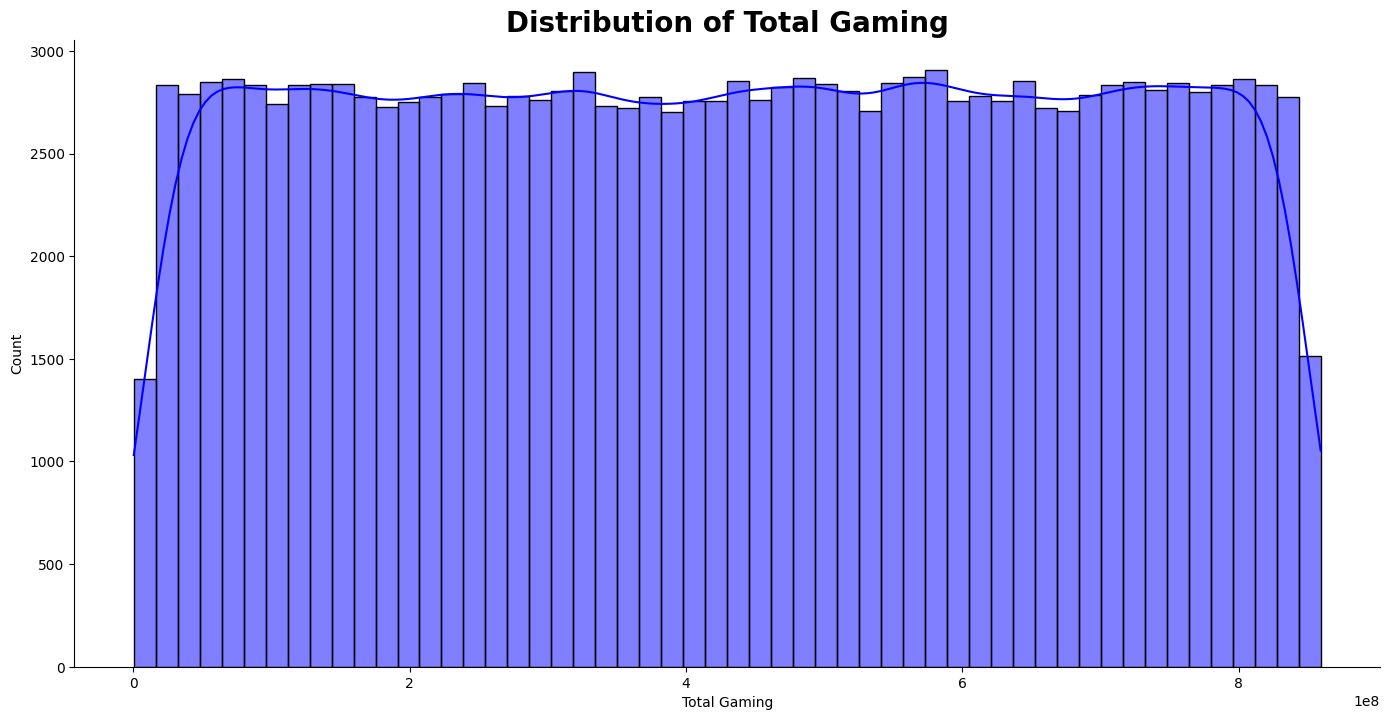

In [52]:
functions.hist(user_app_behaviour, 'Total Gaming', 'blue')

<Figure size 900x700 with 0 Axes>

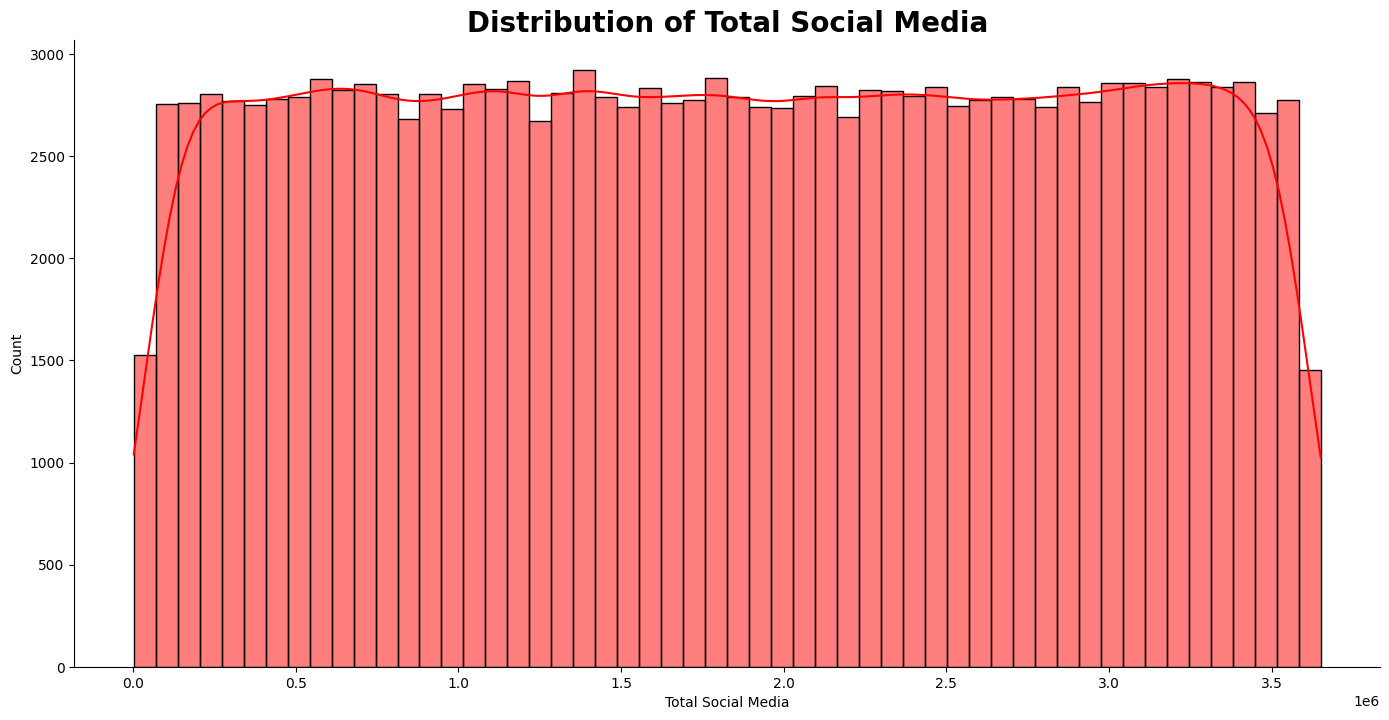

In [53]:
functions.hist(user_app_behaviour, 'Total Social Media', 'red')

Bivariant Analysis

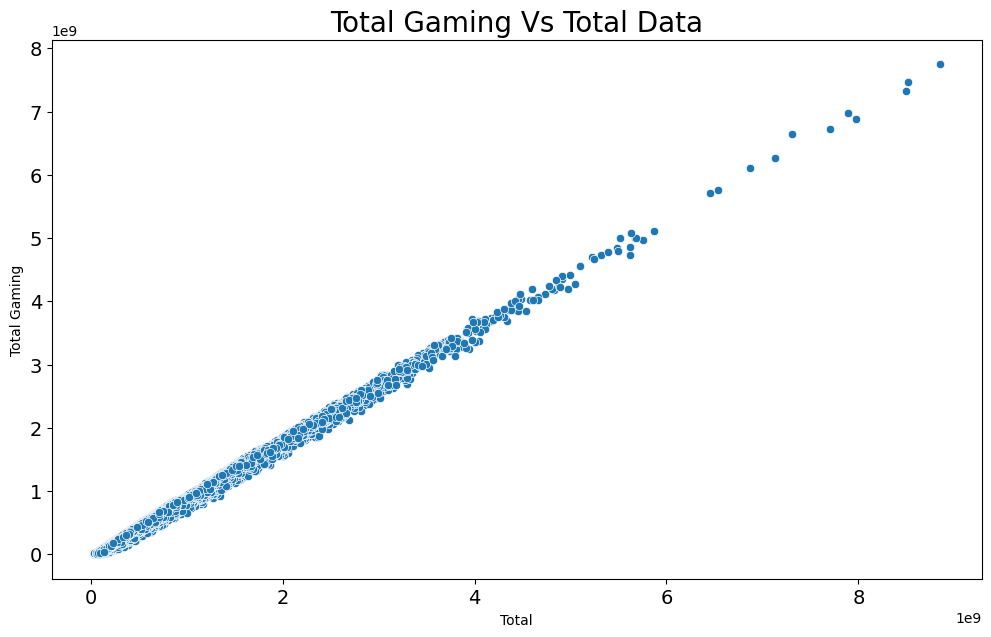

In [54]:
per_user = user_app_behaviour.groupby('MSISDN/Number').sum()
functions.plot_scatter(per_user, 'Total', 'Total Gaming', 'Total Gaming Vs Total Data', None, None)

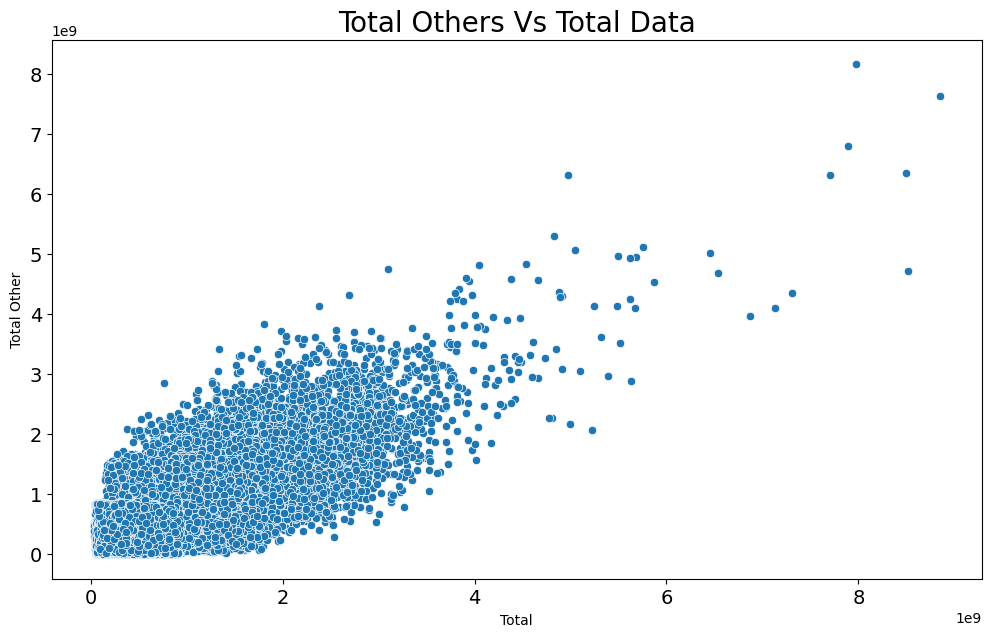

In [55]:
functions.plot_scatter(per_user, 'Total', 'Total Other', 'Total Others Vs Total Data', None, None)

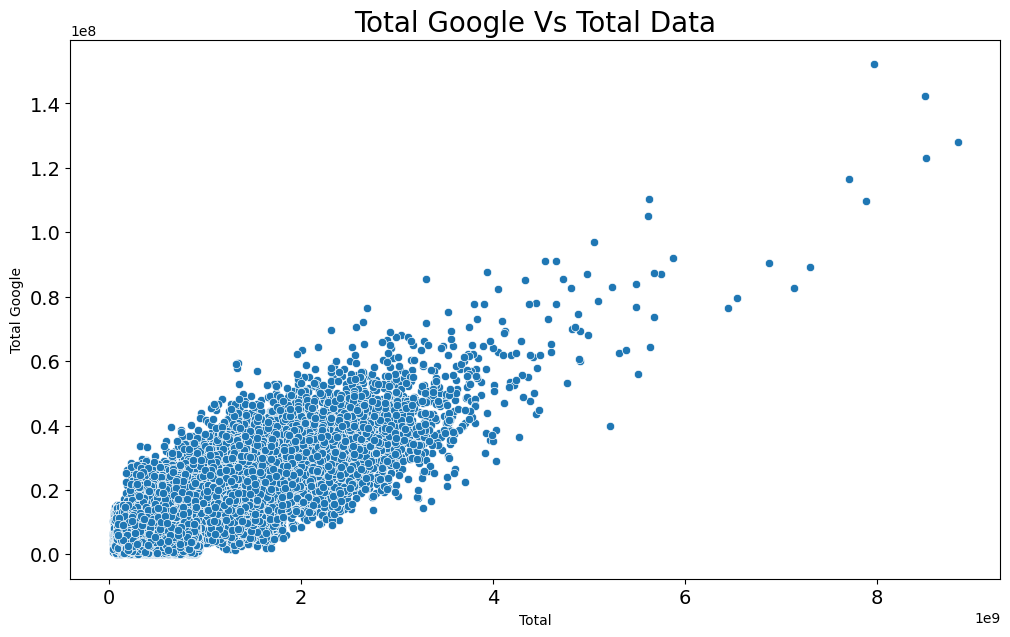

In [56]:
functions.plot_scatter(per_user, 'Total', 'Total Google', 'Total Google Vs Total Data', None, None)

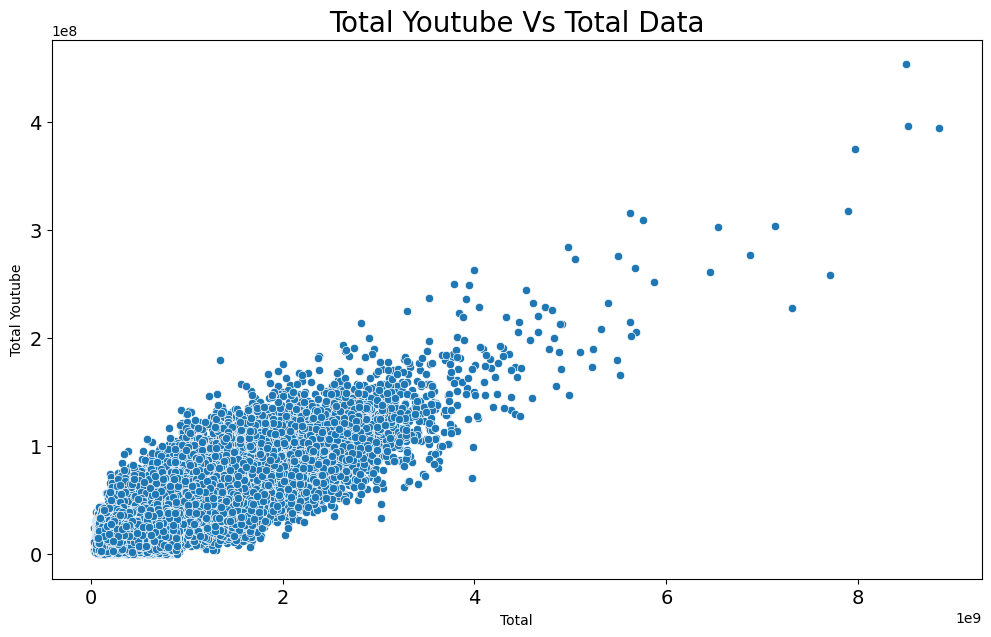

In [57]:
functions.plot_scatter(per_user, 'Total', 'Total Youtube', 'Total Youtube Vs Total Data', None, None)

In [58]:
per_user

,Bearer Id,Dur. (ms),Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
MSISDN/Number,,,,,,,,,,
3.360100e+10,1.311448e+19,116720.00,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0,8.786906e+08
3.360100e+10,7.349883e+18,181230.00,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0,1.568596e+08
3.360100e+10,7.349883e+18,134969.00,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0,5.959665e+08
3.360101e+10,1.304243e+19,49878.00,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0,4.223207e+08
3.360101e+10,1.462771e+19,37104.00,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0,1.457411e+09
...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1.304243e+19,8810.00,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0,7.146416e+08
3.379000e+10,1.311448e+19,140988.00,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0,4.803073e+08
3.197021e+12,7.277826e+18,244958.75,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0,2.321240e+08


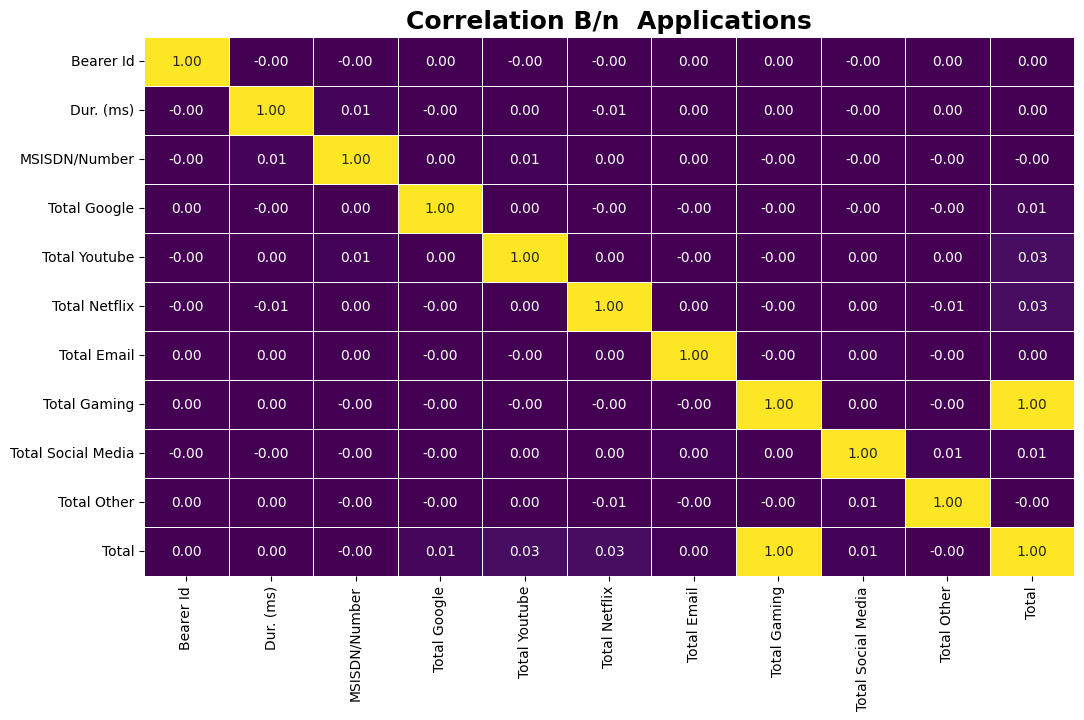

In [59]:
correlation = user_app_behaviour.corr()
functions.plot_heatmap(correlation, 'Correlation B/n  Applications')

In [60]:
per_user['Decile'] = pd.qcut(per_user['Dur. (ms)'], 5, labels = False)
per_user.head()

,Bearer Id,Dur. (ms),Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total,Decile
MSISDN/Number,,,,,,,,,,,
3.360100e+10,1.311448e+19,116720.0,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0,8.786906e+08,2
3.360100e+10,7.349883e+18,181230.0,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0,1.568596e+08,3
3.360100e+10,7.349883e+18,134969.0,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0,5.959665e+08,3
3.360101e+10,1.304243e+19,49878.0,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0,4.223207e+08,0
3.360101e+10,1.462771e+19,37104.0,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0,1.457411e+09,0


In [61]:
decile_data_usage = per_user.groupby('Decile').sum()
filter_columns = total_app_columns[1:]
filter_columns.append('Dur. (ms)')
decile_data_usage[filter_columns]

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total,Dur. (ms)
Decile,,,,,,,,,
0,1.811297e+11,5.246205e+11,5.272059e+11,5.252508e+10,1.001034e+13,4.257877e+10,9.915186e+12,1.152981e+13,6.498382e+08
1,1.953492e+11,5.669781e+11,5.654403e+11,5.618746e+10,1.075407e+13,4.557054e+10,1.075181e+13,1.239038e+13,1.790128e+09
2,1.833248e+11,5.304567e+11,5.316977e+11,5.309017e+10,1.012188e+13,4.275583e+10,1.017342e+13,1.165757e+13,2.144889e+09
3,2.190628e+11,6.356409e+11,6.333274e+11,6.342882e+10,1.209673e+13,5.164722e+10,1.201189e+13,1.393172e+13,3.442541e+09
4,3.806777e+11,1.104841e+12,1.102892e+12,1.102715e+11,2.092710e+13,8.892644e+10,2.091842e+13,2.411732e+13,6.826005e+09


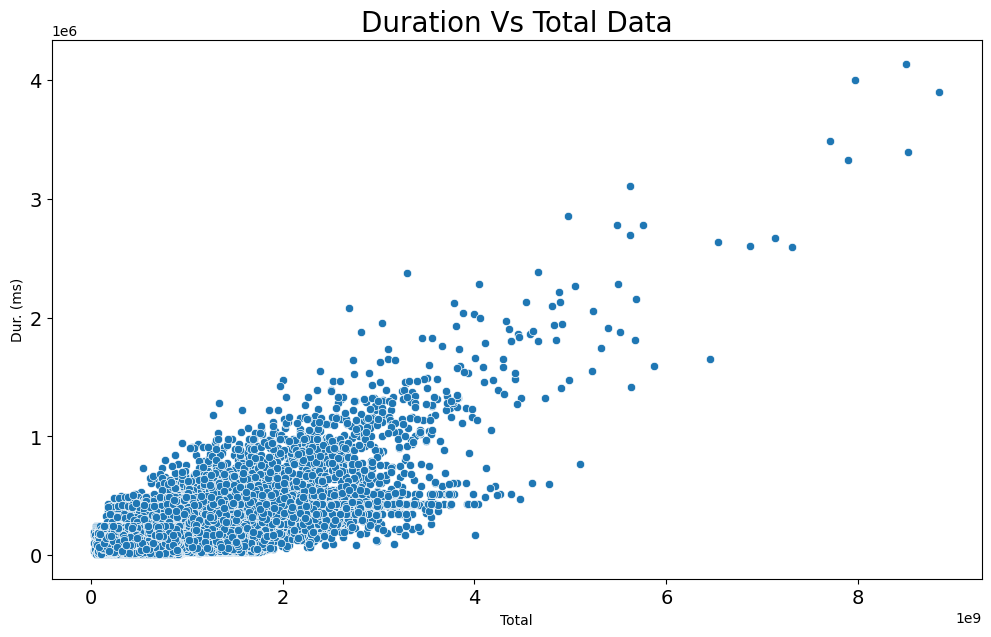

In [62]:
functions.plot_scatter(per_user, 'Total', 'Dur. (ms)', 'Duration Vs Total Data', None, None)

Dimensionality Reduction with PCA

In [63]:
pca_scaled = StandardScaler().fit_transform(X=per_user)
pca = PCA(n_components=4)
pca.fit(pca_scaled)
score = pca.transform(pca_scaled)


principalDf = pd.DataFrame(data = score
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
principalDf.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.735243,-0.020745,1.105922,-0.192686
1,-1.643829,1.471294,-0.480040,-0.555784
2,-0.785789,0.816529,0.322912,-0.385496
3,-2.528905,-0.792803,0.295585,-0.053495
4,1.433497,-2.394871,1.047862,0.210697


In [64]:
pca.explained_variance_


array([7.31323312, 0.98645549, 0.65110952, 0.40798085])